<a href="https://colab.research.google.com/github/HUNKIMY/TABA_DATA_LAB/blob/main/lstm_samsung_cospi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from google.colab import files
files.upload()

Saving samsung_cospi.csv to samsung_cospi (1).csv


{'samsung_cospi.csv': b'Date,High,Low,Open,Volume,Adj Close,Close\r\n2000-01-04,6110,5660,6000,74195000,4719.226074,6110\r\n2000-01-05,6060,5520,5800,74680000,4309.866211,5580\r\n2000-01-06,5780,5580,5750,54390000,4340.76123,5620\r\n2000-01-07,5670,5360,5560,40305000,4278.97168,5540\r\n2000-01-10,5770,5580,5600,46880000,4456.618652,5770\r\n2000-01-11,6100,5770,5820,59745000,4456.618652,5770\r\n2000-01-12,5740,5600,5610,29220000,4417.999023,5720\r\n2000-01-13,5740,5560,5600,41190000,4410.274902,5710\r\n2000-01-14,5880,5680,5720,49375000,4502.960938,5830\r\n2000-01-17,6180,5920,6000,63505000,4711.502441,6100\r\n2000-01-18,6160,5980,6160,45260000,4711.502441,6100\r\n2000-01-19,6040,5960,6000,40205000,4603.370117,5960\r\n2000-01-20,6040,5820,5860,37315000,4665.162109,6040\r\n2000-01-21,5980,5880,5950,32535000,4541.580566,5880\r\n2000-01-24,5900,5700,5800,34355000,4402.552246,5700\r\n2000-01-25,5640,5440,5520,44250000,4201.733398,5440\r\n2000-01-26,5520,5410,5500,29285000,4232.628418,5480\r

In [29]:
df = pd.read_csv('samsung_cospi.csv', index_col='Date')

In [30]:
#date:날짜
#High: 고가
#Low: 저가
#open: 시가
#adj close: 주식의 분할, 배당, 배분 등을 고려해 조정한 종가 -> 조정종가, Target values
df

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
1/4/2000,6110,5660,6000,74195000,4719.226074,6110
1/5/2000,6060,5520,5800,74680000,4309.866211,5580
1/6/2000,5780,5580,5750,54390000,4340.761230,5620
1/7/2000,5670,5360,5560,40305000,4278.971680,5540
1/10/2000,5770,5580,5600,46880000,4456.618652,5770
...,...,...,...,...,...,...
7/26/2021,79500,78800,79400,10040975,78800.000000,78800
7/27/2021,79400,78500,79200,11427693,78500.000000,78500
7/28/2021,79200,78100,78300,12743417,79200.000000,79200


In [31]:
df.head(5)

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
1/4/2000,6110,5660,6000,74195000,4719.226074,6110
1/5/2000,6060,5520,5800,74680000,4309.866211,5580
1/6/2000,5780,5580,5750,54390000,4340.761230,5620
1/7/2000,5670,5360,5560,40305000,4278.971680,5540
1/10/2000,5770,5580,5600,46880000,4456.618652,5770


<Axes: xlabel='Date'>

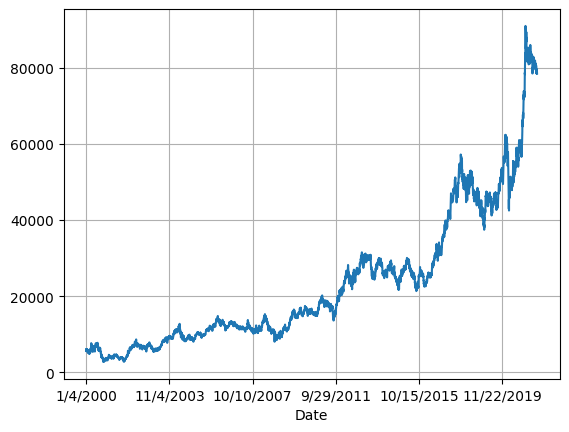

In [32]:
df['Close'].plot(grid=True)

In [33]:
X=df.drop(columns='Close')
y=df.iloc[:,5:] #배열에 접근하는법-iloc[행, 열] 전체행에서 5열부터 다 가져온다는 뜻뜻
print(X)

            High    Low   Open    Volume     Adj Close
Date                                                  
1/4/2000    6110   5660   6000  74195000   4719.226074
1/5/2000    6060   5520   5800  74680000   4309.866211
1/6/2000    5780   5580   5750  54390000   4340.761230
1/7/2000    5670   5360   5560  40305000   4278.971680
1/10/2000   5770   5580   5600  46880000   4456.618652
...          ...    ...    ...       ...           ...
7/26/2021  79500  78800  79400  10040975  78800.000000
7/27/2021  79400  78500  79200  11427693  78500.000000
7/28/2021  79200  78100  78300  12743417  79200.000000
7/29/2021  79400  78800  78800  14360453  79000.000000
7/30/2021  78900  78500  78900  13823411  78500.000000

[5419 rows x 5 columns]


In [34]:
print(y)

           Close
Date            
1/4/2000    6110
1/5/2000    5580
1/6/2000    5620
1/7/2000    5540
1/10/2000   5770
...          ...
7/26/2021  78800
7/27/2021  78500
7/28/2021  79200
7/29/2021  79000
7/30/2021  78500

[5419 rows x 1 columns]


In [35]:
## 0~100 까지 수 Normalize 하는 법 - [사이수/(100-0)] -> 0~1 사이로 바꿔줄수 있음음

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
ss=MinMaxScaler()

In [37]:
y_mm = mm.fit_transform(y)
y_mm

array([[0.03829161],
       [0.0322873 ],
       [0.03274046],
       ...,
       [0.86631925],
       [0.86405347],
       [0.85838903]])

In [38]:
X_ss = ss.fit_transform(X)
X_ss

array([[0.03562314, 0.03720717, 0.03942571, 0.45181622, 0.02963617],
       [0.03509145, 0.03559945, 0.03714676, 0.45476966, 0.02498908],
       [0.03211399, 0.03628847, 0.03657703, 0.33121213, 0.0253398 ],
       ...,
       [0.8128456 , 0.8690859 , 0.86326345, 0.07760203, 0.8751488 ],
       [0.81497235, 0.87712448, 0.8689608 , 0.08744909, 0.87287838],
       [0.80965547, 0.87367938, 0.87010027, 0.08417874, 0.86720234]])

In [39]:
y_mm.shape

(5419, 1)

In [40]:
X_ss.shape

(5419, 5)

In [41]:
X_train = X_ss[:4800, :] #0~4800 까지 가져온다 모든 열을
X_test = X_ss[4800:, :] #4800~에서 끝까지 가져온다 모든 열을을

In [42]:
y_train = y_mm[:4800, :]
y_test = y_mm[4800:, :]


In [43]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_train.shape, y_train.shape)

Training Shape (4800, 5) (4800, 1)
Testing Shape (4800, 5) (4800, 1)


In [44]:
X_train_tensors = torch.Tensor(X_train)
X_test_tensors= torch.Tensor(X_test)

In [45]:
y_train_tensors = torch.Tensor(y_train)
y_test_tensors= torch.Tensor(y_test)

In [46]:
X_train_tensors_final = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

In [47]:
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([4800, 1, 5]) torch.Size([4800, 1])
Testing Shape torch.Size([619, 1, 5]) torch.Size([619, 1])


In [52]:
X_train_tensors.shape

torch.Size([4800, 5])

In [53]:
X_train_tensors_final.shape

torch.Size([4800, 1, 5])

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

In [54]:
print(device)

cpu


In [55]:
#파라미터 주기
num_epochs=1000
learning_rate = 0.001 #크면 클수록 발산하게 됨?

input_size = 5 #number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 #number of stacked lstm layers - lstm layer
num_classes =1

In [58]:
class LSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM1, self).__init__()
    self.num_classes = num_classes
    self.num_layers = num_layers
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.seq_length = seq_length
    
    self.lstm = nn.LSTM(input_size = input_size,
                        hidden_size = hidden_size,
                        num_layers = num_layers,
                        batch_first = True)
    
    self.fc_1 = nn.Linear(hidden_size, 128)
    self.fc = nn.Linear(128, num_classes)

    self.relu = nn.ReLU()

  def forward(self, x):
    #Propagate input through LSTM
    output, (hn, cn) = self.lstm(x) #lstm with input, hidden, and internal state
    #output.shape: [4800, 1, 2]
    #hn.shape: [ 1, 4800, 2]
    #cn.shape:[1, 4800, 2]

    hn = hn.view(-1, self.hidden_size) #refreshing the data for Dense layer next . hn = (4800, 2)
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output

    return out

In [59]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

In [60]:
loss_function = torch.nn.MSELoss() #mean_squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) #adam optimizer

In [62]:
#training
for epoch in range(num_epochs):
  outputs=lstm1.forward(X_train_tensors_final.to(device)) #forward pass
  optimizer.zero_grad() #calculate the gradient, manually setting to 0

  #the loss
  loss = loss_function(outputs, y_train_tensors.to(device))
  loss.backward()

  optimizer.step() #improve from loss i.e backpropagation

  if epoch %100 == 0:
    print('Epoch : %d, loss : %.5f' %(epoch, loss.item()))

Epoch : 0, loss : 0.02544
Epoch : 100, loss : 0.00793
Epoch : 200, loss : 0.00011
Epoch : 300, loss : 0.00006
Epoch : 400, loss : 0.00004
Epoch : 500, loss : 0.00002
Epoch : 600, loss : 0.00002
Epoch : 700, loss : 0.00002
Epoch : 800, loss : 0.00002
Epoch : 900, loss : 0.00002


In [64]:
test_predict = lstm1(X_test_tensors_final.to(device)) #forward pass

In [65]:
test_data_predict = test_predict.data.detach().cpu().numpy() #numpy conversion

In [68]:
test_data_predict

array([[0.49679756],
       [0.5019335 ],
       [0.5079291 ],
       [0.5068586 ],
       [0.5073637 ],
       [0.49400276],
       [0.48951077],
       [0.49806076],
       [0.50433165],
       [0.5155228 ],
       [0.5055334 ],
       [0.5044131 ],
       [0.49956673],
       [0.509862  ],
       [0.5089948 ],
       [0.5092798 ],
       [0.5139676 ],
       [0.51102597],
       [0.5088464 ],
       [0.5019199 ],
       [0.49589324],
       [0.4852863 ],
       [0.4808123 ],
       [0.48254043],
       [0.48132062],
       [0.4807009 ],
       [0.4865647 ],
       [0.4806317 ],
       [0.48061448],
       [0.48272973],
       [0.47845572],
       [0.47826946],
       [0.48114848],
       [0.4996624 ],
       [0.50871646],
       [0.49539024],
       [0.49480945],
       [0.4931531 ],
       [0.49189657],
       [0.4895869 ],
       [0.49370158],
       [0.50006276],
       [0.5113863 ],
       [0.510766  ],
       [0.5122643 ],
       [0.51278603],
       [0.50954646],
       [0.509

In [69]:
test_data_predict = mm.inverse_transform(test_data_predict) #reverse tranformation
y_test = mm.inverse_transform(y_test)

Text(0.5, 1.0, 'Time_Series Prediction')

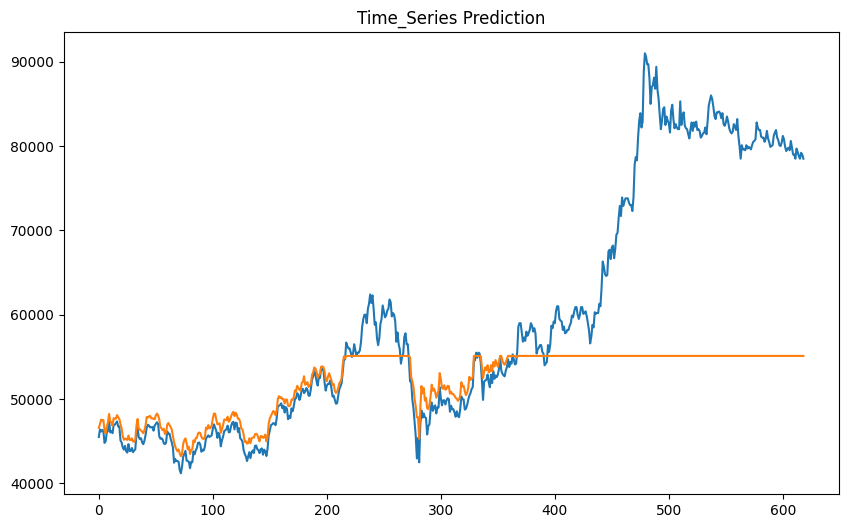

In [71]:
plt.figure(figsize=(10, 6)) #plotting
plt.plot(y_test, label = 'Actual Data') #True plot
plt.plot(test_data_predict, label = 'Predicted Data') #predicted plot
plt.title('Time_Series Prediction')